In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [21]:
f = "../data/002_processed/esolmet_2018.parquet"
tmx = pd.read_parquet(f)
tmx

,Ib,Ig,Id,uv,To,hr,ws,p
Fecha,,,,,,,,
2018-01-01 00:00:00,0.057,0.0,0.0,0.001,18.93,41.57,1.253,879.0692
2018-01-01 00:10:00,0.002,0.0,0.0,0.001,18.76,41.00,0.418,879.4363
2018-01-01 00:20:00,0.170,0.0,0.0,0.001,18.92,40.96,0.955,879.5181
2018-01-01 00:30:00,0.371,0.0,0.0,0.001,18.52,42.46,1.823,879.5826
2018-01-01 00:40:00,0.305,0.0,0.0,0.001,18.49,42.43,2.149,879.6826
...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.125,0.0,0.0,0.000,18.88,59.60,2.145,875.5595
2018-12-31 23:20:00,0.000,0.0,0.0,0.000,18.71,59.67,1.638,875.5595
2018-12-31 23:30:00,0.044,0.0,0.0,0.000,18.52,58.75,1.923,875.2889


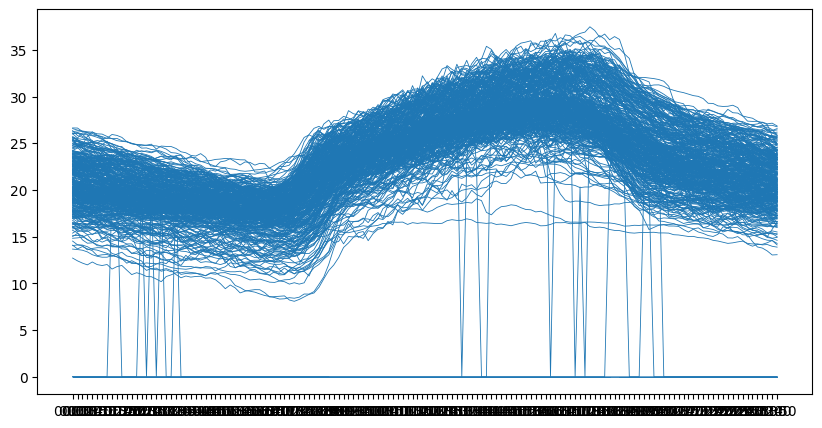

In [46]:

col = "To"
df = tmx

# Hora del día en horas decimales (0..24)
df["tod_h"] = df.index.strftime("%H:%M")
df["day"]   = df.index.normalize()  # fecha sin hora

# Tabla: filas = hora-del-día, columnas = día, valores = To
# (agg=mean por si tienes duplicados puntuales en un mismo minuto)
piv = (df.pivot_table(index="tod_h", columns="day", values=col)
         .sort_index())

fig, ax = plt.subplots(figsize=(10, 5))

# for d in piv.columns:
ax.plot(piv, lw=0.6, alpha=1, color="tab:blue")

plt.show()


In [47]:
piv

day,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2018-12-22,2018-12-23,2018-12-24,2018-12-25,2018-12-26,2018-12-27,2018-12-28,2018-12-29,2018-12-30,2018-12-31
tod_h,,,,,,,,,,,,,,,,,,,,,
00:00,18.93,19.51,17.74,20.18,17.57,18.48,20.25,17.09,18.09,17.38,...,15.01,14.83,16.04,16.96,17.15,17.56,17.63,17.46,18.92,17.93
00:10,18.76,19.55,17.47,19.96,17.55,18.72,20.10,16.91,17.98,17.15,...,15.35,14.87,16.32,17.22,17.05,17.52,17.38,17.42,18.44,18.14
00:20,18.92,19.64,17.43,19.75,17.52,18.57,19.30,16.85,18.03,17.38,...,14.66,14.94,16.49,17.32,16.62,17.59,17.57,17.11,18.43,18.27
00:30,18.52,19.60,17.30,19.47,17.40,18.35,19.85,16.64,17.55,17.21,...,14.30,15.20,16.33,16.89,16.68,17.42,16.92,16.94,18.24,17.64
00:40,18.49,19.34,17.18,19.36,17.82,18.49,19.57,16.41,17.34,16.72,...,14.34,14.58,16.65,16.67,16.37,17.32,16.48,16.81,18.10,17.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23:10,20.08,17.50,20.87,18.32,19.15,19.11,17.76,20.05,17.77,19.07,...,15.64,16.15,17.59,18.08,18.28,18.63,18.38,18.40,19.11,18.88
23:20,19.99,17.60,21.08,18.32,19.16,19.78,18.25,19.62,17.78,18.98,...,15.26,16.25,17.63,17.93,18.16,18.42,18.14,18.79,18.57,18.71
23:30,19.83,18.08,20.90,18.55,19.01,19.92,17.78,19.39,17.84,18.71,...,15.38,16.17,17.46,17.51,17.91,18.16,17.93,18.80,18.12,18.52


In [14]:
dias_agrupados = tmx.To.groupby(tmx.index.dayofyear)
dias_agrupados.head(2)

Fecha
2018-01-01 00:00:00    18.93
2018-01-01 00:10:00    18.76
2018-01-02 00:00:00    19.51
2018-01-02 00:10:00    19.55
2018-01-03 00:00:00    17.74
                       ...  
2018-12-29 00:10:00    17.42
2018-12-30 00:00:00    18.92
2018-12-30 00:10:00    18.44
2018-12-31 00:00:00    17.93
2018-12-31 00:10:00    18.14
Name: To, Length: 728, dtype: float64

In [25]:
piv

day,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2018-12-22,2018-12-23,2018-12-24,2018-12-25,2018-12-26,2018-12-27,2018-12-28,2018-12-29,2018-12-30,2018-12-31
tod_h,,,,,,,,,,,,,,,,,,,,,
0.000000,18.93,19.51,17.74,20.18,17.57,18.48,20.25,17.09,18.09,17.38,...,15.01,14.83,16.04,16.96,17.15,17.56,17.63,17.46,18.92,17.93
0.166667,18.76,19.55,17.47,19.96,17.55,18.72,20.10,16.91,17.98,17.15,...,15.35,14.87,16.32,17.22,17.05,17.52,17.38,17.42,18.44,18.14
0.333333,18.92,19.64,17.43,19.75,17.52,18.57,19.30,16.85,18.03,17.38,...,14.66,14.94,16.49,17.32,16.62,17.59,17.57,17.11,18.43,18.27
0.500000,18.52,19.60,17.30,19.47,17.40,18.35,19.85,16.64,17.55,17.21,...,14.30,15.20,16.33,16.89,16.68,17.42,16.92,16.94,18.24,17.64
0.666667,18.49,19.34,17.18,19.36,17.82,18.49,19.57,16.41,17.34,16.72,...,14.34,14.58,16.65,16.67,16.37,17.32,16.48,16.81,18.10,17.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23.166667,20.08,17.50,20.87,18.32,19.15,19.11,17.76,20.05,17.77,19.07,...,15.64,16.15,17.59,18.08,18.28,18.63,18.38,18.40,19.11,18.88
23.333333,19.99,17.60,21.08,18.32,19.16,19.78,18.25,19.62,17.78,18.98,...,15.26,16.25,17.63,17.93,18.16,18.42,18.14,18.79,18.57,18.71
23.500000,19.83,18.08,20.90,18.55,19.01,19.92,17.78,19.39,17.84,18.71,...,15.38,16.17,17.46,17.51,17.91,18.16,17.93,18.80,18.12,18.52


In [19]:
for _,dia in dias_agrupados:
    dia.index.map(lambda x: x.replace(day=1,month=1))

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:10:00',
               '2018-01-01 00:20:00', '2018-01-01 00:30:00',
               '2018-01-01 00:40:00', '2018-01-01 00:50:00',
               '2018-01-01 01:00:00', '2018-01-01 01:10:00',
               '2018-01-01 01:20:00', '2018-01-01 01:30:00',
               ...
               '2018-01-01 22:20:00', '2018-01-01 22:30:00',
               '2018-01-01 22:40:00', '2018-01-01 22:50:00',
               '2018-01-01 23:00:00', '2018-01-01 23:10:00',
               '2018-01-01 23:20:00', '2018-01-01 23:30:00',
               '2018-01-01 23:40:00', '2018-01-01 23:50:00'],
              dtype='datetime64[ns]', name='Fecha', length=144, freq=None)

In [20]:
dia

Fecha
2018-01-01 00:00:00    18.93
2018-01-01 00:10:00    18.76
2018-01-01 00:20:00    18.92
2018-01-01 00:30:00    18.52
2018-01-01 00:40:00    18.49
                       ...  
2018-01-01 23:10:00    20.08
2018-01-01 23:20:00    19.99
2018-01-01 23:30:00    19.83
2018-01-01 23:40:00    19.79
2018-01-01 23:50:00    19.71
Name: To, Length: 144, dtype: float64

In [10]:
for _, dia in dias_agrupados:
    print(dia.index.map(lambda x: x.replace(day=1,month=1)) )

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:10:00',
               '2018-01-01 00:20:00', '2018-01-01 00:30:00',
               '2018-01-01 00:40:00', '2018-01-01 00:50:00',
               '2018-01-01 01:00:00', '2018-01-01 01:10:00',
               '2018-01-01 01:20:00', '2018-01-01 01:30:00',
               ...
               '2018-01-01 22:20:00', '2018-01-01 22:30:00',
               '2018-01-01 22:40:00', '2018-01-01 22:50:00',
               '2018-01-01 23:00:00', '2018-01-01 23:10:00',
               '2018-01-01 23:20:00', '2018-01-01 23:30:00',
               '2018-01-01 23:40:00', '2018-01-01 23:50:00'],
              dtype='datetime64[ns]', name='Fecha', length=144, freq=None)
DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:10:00',
               '2018-01-01 00:20:00', '2018-01-01 00:30:00',
               '2018-01-01 00:40:00', '2018-01-01 00:50:00',
               '2018-01-01 01:00:00', '2018-01-01 01:10:00',
               '2018-01-01 01:20:00', '2018-01-01 0